### 数据预处理

### 预备流程

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [4]:
pwd

'C:\\Users\\lenovo\\Automobile\\机会战败'

### 合并试乘试驾表 Concatenating the test drive sheet

#### 读取2019年与2020年数据, 并统一变量

In [37]:
# 读取2019年表数据并查看表头字段
test_drive_1 = pd.read_excel('C:/Users/lenovo/Automobile/机会战败模型/4-试乘试驾表-V3/试乘试驾表2019-v3 all done 加密版2.xlsx', index_col=0, encoding = "utf_8_sig").reset_index(drop=True)
test_drive_1.columns

Index(['dwd_jetta_sales_testdrive_dms_v1_t_d.concat_id',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.jdealer',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.nbid',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vid',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vcusmobile',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vcusid',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vprojectid',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vdrivecarid',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vrelatephone',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vtrycarpath',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vstate',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vmemo',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.bappoint',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.dappointbegin',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.dappointend',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.dtrybegin',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.dtryend',
       'dwd_jetta_sales_testdrive_dms_v1_t

In [40]:
# 查看某字段最小值
test_drive_1['dwd_jetta_sales_testdrive_dms_v1_t_d.kf_testdrivedistance'].min()

-9908.0

In [ ]:
# 讲所有表头含‘dwd_jetta_sales_testdrive_dms_v1_t_d.’以下字段统统删除
col_1 = list(test_drive_1.columns) 
col_1 = [x.replace('dwd_jetta_sales_testdrive_dms_v1_t_d.', '') for x in col_1]
test_drive_1.columns = col_1
# 查看是否清理完成
test_drive_1.columns

In [29]:
# 查看表格维度
test_drive_1.shape

(36268, 47)

In [41]:
# 读取2020年数据，所有步骤同上
test_drive_2 = pd.read_excel('C:/Users/lenovo/Automobile/机会战败模型/4-试乘试驾表-V3/试乘试驾表2020-v3 all done 加密2.xlsx', index_col=0, encoding = "utf_8_sig").reset_index(drop=True)

col_2 = list(test_drive_2.columns) 
col_2 = [x.replace('dwd_jetta_sales_testdrive_dms_v1_t_d.', '') for x in col_2]
test_drive_2.columns = col_2

print(test_drive_2.columns)
test_drive_2.shape

Index(['dwd_jetta_sales_testdrive_dms_v1_t_d.concat_id',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.jdealer',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.nbid',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vid',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vcusmobile',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vcusid',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vprojectid',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vdrivecarid',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vrelatephone',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vtrycarpath',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vstate',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.vmemo',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.bappoint',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.dappointbegin',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.dappointend',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.dtrybegin',
       'dwd_jetta_sales_testdrive_dms_v1_t_d.dtryend',
       'dwd_jetta_sales_testdrive_dms_v1_t

#### 合并2019与2020年数据

In [39]:
# 将两表数据写进一个set并发现其相同变量
set_a = set(test_drive_1.columns)
set_b = set(test_drive_2.columns)


In [41]:
# 验证47个字段相同
len(set_a.intersection(set_b))

47

In [140]:
# 合并
test_drive_ttl = pd.concat([test_drive_1,test_drive_2],axis=0).reset_index(drop=True)

In [70]:
# 查看表维度
test_drive_ttl.shape

(132020, 47)

#### 检验试乘试驾表中的变量状况

In [69]:
# 经验证以下字段几乎为空值
test_drive_ttl[['dappointbegin','dappointend','vsjno','vfromid','vfromtype','feedback','is_deleted']].isna().sum()

dappointbegin    132011
dappointend      132011
vsjno            132020
vfromid          132020
vfromtype        132020
feedback         132020
is_deleted       132020
dtype: int64

In [ ]:
# 进行变量删除并及时留档为test_drive_ttl.csv
test_drive_ttl.drop(['dappointbegin','dappointend','vsjno','vfromid','vfromtype','feedback','is_deleted','ods_update_time','vstate','Y-备注','day_no'], axis=1, inplace=True)

# 为空值因此删除
# td_ttl.drop(131999, inplace=True)

# 保存试乘试驾合并表为 test_drive_ttl.csv
test_drive_ttl.to_csv('C:/Users/lenovo/Automobile/机会战败模型/4-试乘试驾表-V3/test_drive_ttl.csv', encoding='utf_8_sig', index=True)

In [9]:
# 检查各变量unique值的情况
td_ttl.nunique()

concat_id                89925
jdealer                    234
nbid                       234
vid                     132010
vcusmobile              117540
vcusid                  119714
vprojectid              119714
vdrivecarid                767
vrelatephone            115844
vtrycarpath                  3
vmemo                     2515
bappoint                     1
dtrybegin                95398
dtryend                  94603
fbeginmile                9391
fendmile                  9403
bisapp                       2
vowner                    2098
drivetype                    2
pk                       43629
vseries                      3
vmodel                       7
intentvmodel                24
intentvseries                5
voriginvw                    7
vorigin                     52
kf_testdrivetime          3164
kf_testdrivedistance       163
kf_testdrivecuscount         2
kf_testdrivecount            1
visit_day                  316
cleaned_distance            51
cleaned_

#### 将表保存成csv格式

test_drive_ttl.to_csv('C:/Users/lenovo/Automobile/机会战败模型/4-试乘试驾表-V3/test_drive_ttl.csv', encoding='utf_8_sig', index=True)

In [3]:
td_ttl = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/4-试乘试驾表-V3/test_drive_ttl.csv', index_col=0,low_memory = False, encoding = "utf_8_sig")

In [165]:
td_ttl.to_csv('C:/Users/lenovo/Automobile/机会战败模型/4-试乘试驾表-V3/test_drive_ttl.csv', encoding='utf_8_sig', index=True)

#### 数据清理

In [7]:
# 检查是驾照id, 发现单数值重复过多，因此该变量不可用 如6d1993e5-c4e4-47fd-bc62-dd93bb6ba904 出现 1549次
td_ttl['vdrivecarid'].value_counts()

6d1993e5-c4e4-47fd-bc62-dd93bb6ba904    1549
86a9618d-e5ec-405b-81d1-3cd3724a96e5    1413
93258592-463f-445d-a562-b182d2709e28    1244
27451868-c13b-4913-9a1e-5abcaf72ac18    1171
864a000a-d708-456d-9156-9054fc9f07be    1123
                                        ... 
61088f49-07fa-44d2-9bd7-dd0331fe0858       1
e135f108-5db6-46e9-8fa7-d33c5b44ba36       1
43da3630-c5a4-4bda-935a-d782b3c5b574       1
ac6e9669-bdf0-4701-952d-c39067dc83e7       1
4468db4c-2483-4bca-9c18-392d1d52b0e7       1
Name: vdrivecarid, Length: 767, dtype: int64

In [187]:
# 意向车系里 有 '0L', '0M', nan, 'L0'
td_ttl['vseries'].unique()

array(['0L', '0M', nan, 'L0'], dtype=object)

In [183]:
# 车型有7 - 24种，与线现有信息不符合
td_ttl[['vseries','vmodel','intentvmodel','intentvseries']].nunique()

vseries           3
vmodel            7
intentvmodel     24
intentvseries     5
dtype: int64

In [74]:
# 是否预约值只有 nan 和 False
td_ttl['bappoint'].unique()

array([nan, False], dtype=object)

##### 去除drivetype为空值的行

In [10]:
# 此步骤发现drivetype为空值的行
td_ttl = td_ttl[~td_ttl['drivetype'].isna()]


,concat_id,jdealer,nbid,vid,vcusmobile,vcusid,vprojectid,vdrivecarid,vrelatephone,vtrycarpath,vmemo,bappoint,dtrybegin,dtryend,fbeginmile,fendmile,bisapp,vowner,drivetype,pk,vseries,vmodel,intentvmodel,intentvseries,voriginvw,vorigin,kf_testdrivetime,kf_testdrivedistance,kf_testdrivecuscount,kf_testdrivecount,visit_day,cleaned_distance,cleaned_time


##### 去除试驾路线为空值的行

In [108]:
td_ttl = td_ttl[~td_ttl['vtrycarpath'].isna()]

,concat_id,jdealer,nbid,vid,vcusmobile,vcusid,vprojectid,vdrivecarid,vrelatephone,vtrycarpath,vmemo,bappoint,dtrybegin,dtryend,fbeginmile,fendmile,bisapp,vowner,electronicsign,createby,createon,updateby,updateon,record_version,drivetype,pk,vseries,vmodel,intentvmodel,intentvseries,voriginvw,vorigin,kf_testdrivetime,kf_testdrivedistance,kf_testdrivecuscount,kf_testdrivecount,day_no
36254,20191210_SJ11002_0L14PY_0L_01_03,SJ11002,75E11002-0000-0000-0000-000000000000,4b69f507-9e26-455a-b110-8dee2a79f503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 09:00:00,2019-12-10 09:10:00,429.0,435.0,False,瞿春雨,NaN,b2492259-bca9-11e9-8f2e-fa163e15a545,2019-12-10 16:34:32,NaN,1575966872055,1,2.0,4627,0L,0L13PY,0L14PY,0L,1,3,10.00,6.0,1.0,1,0
36256,20191128_SJ51006_#_0L_06_01,SJ51006,75E51006-0000-0000-0000-000000000000,dddb7a43-5485-415b-9d2f-40e6be9a4518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-28 12:27:00,2019-11-28 13:25:00,2275.0,2300.0,False,刘玉梅,NaN,3bd6f5d8-adbd-11e9-8f2e-fa163e15a545,2019-11-29 09:42:42,NaN,1574991762495,1,2.0,8728,0L,0L13PY,NaN,0L,6,1,58.00,25.0,0.0,1,0
36257,20191217_SJ42005_0L13PY_0L_06_01,SJ42005,75E42005-0000-0000-0000-000000000000,488dc090-90ec-415c-b886-4b386daa00a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-17 14:10:00,2019-12-17 14:40:00,882.0,892.0,False,应金平,NaN,3b6e67ae-13e7-11ea-8f2e-fa163e15a545,2019-12-17 14:58:29,NaN,1576565909439,1,2.0,5269,0L,0L13PY,0L13PY,0L,6,1,30.00,10.0,1.0,1,0
36260,20191130_SJ50001_0L14PY_0L_06_01,SJ50001,75886100-0000-0000-0000-000000000000,b0235372-a7fe-47f0-840d-8b04bc432b7f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-30 09:40:00,2019-11-30 09:50:00,720.0,730.0,False,王丽丹,NaN,22e8bcde-b7e0-11e9-8f2e-fa163e15a545,2019-12-01 10:03:19,NaN,1575165799417,1,1.0,9525,0L,0L13PY,0L14PY,0L,6,1,10.00,10.0,1.0,1,0
36261,20191010_SJ41006_0L13PY_0L_06_01,SJ41006,75E41006-0000-0000-0000-000000000000,b9f4e5c0-f2df-4636-8273-1d6f519eb5ed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-10 11:00:00,2019-10-10 11:10:00,3788.0,3796.0,False,许昊,NaN,f2441c91-9fe9-11e9-b1e7-fa163e15a545,2019-10-10 13:38:30,NaN,1570685909544,1,2.0,1538,0L,0L14PY,0L13PY,0L,6,1,10.00,8.0,1.0,1,0
36262,20190929_SJ41009_0L13PY_0L_06_01,SJ41009,75E41009-0000-0000-0000-000000000000,7be21a3f-b126-426b-842e-a1708cedb823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-29 11:06:00,2019-09-29 11:36:18,6135.0,6145.0,False,王闯,NaN,06fafde9-af64-11e9-8f2e-fa163e15a545,2019-09-29 11:37:29,NaN,1569728249165,1,2.0,431,0L,0L14PY,0L13PY,0L,6,1,30.30,10.0,1.0,1,0
36263,20191012_SJ32003_0L14PY_0L_06_01,SJ32003,75E32003-0000-0000-0000-000000000000,98b938f3-07f3-4f4f-b9b8-2cc3bb888541,NaN,NaN,NaN,NaN,NaN,NaN,客户试乘,NaN,2019-10-12 09:15:33,2019-10-12 09:25:00,3285.0,3289.0,False,吴国玮,NaN,ab93da3f-ddc2-11e9-8f2e-fa163e15a545,2019-10-12 11:24:54,NaN,1570850694307,1,1.0,1650,0L,0L14PY,0L14PY,0L,6,1,9.45,4.0,1.0,1,0


##### 清楚既无vcusid 也无手机号的数据

In [125]:
td_ttl = td_ttl[~ td_ttl['vcusid'].isna() & td_ttl['vcusmobile'].isna()]


,concat_id,jdealer,nbid,vid,vcusmobile,vcusid,vprojectid,vdrivecarid,vrelatephone,vtrycarpath,vmemo,bappoint,dtrybegin,dtryend,fbeginmile,fendmile,bisapp,vowner,electronicsign,createby,createon,updateby,updateon,record_version,drivetype,pk,vseries,vmodel,intentvmodel,intentvseries,voriginvw,vorigin,kf_testdrivetime,kf_testdrivedistance,kf_testdrivecuscount,kf_testdrivecount,day_no
36257,20190929_SJ41009_0L13PY_0L_06_01,SJ41009,75E41009-0000-0000-0000-000000000000,7be21a3f-b126-426b-842e-a1708cedb823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-29 11:06:00,2019-09-29 11:36:18,6135.0,6145.0,False,王闯,NaN,06fafde9-af64-11e9-8f2e-fa163e15a545,2019-09-29 11:37:29,NaN,1569728249165,1,2.0,431,0L,0L14PY,0L13PY,0L,6,1,30.30,10.0,1.0,1,0
36258,20191012_SJ32003_0L14PY_0L_06_01,SJ32003,75E32003-0000-0000-0000-000000000000,98b938f3-07f3-4f4f-b9b8-2cc3bb888541,NaN,NaN,NaN,NaN,NaN,NaN,客户试乘,NaN,2019-10-12 09:15:33,2019-10-12 09:25:00,3285.0,3289.0,False,吴国玮,NaN,ab93da3f-ddc2-11e9-8f2e-fa163e15a545,2019-10-12 11:24:54,NaN,1570850694307,1,1.0,1650,0L,0L14PY,0L14PY,0L,6,1,9.45,4.0,1.0,1,0


In [132]:
# 检查以下字段
td_ttl[['concat_id','dtrybegin','dtryend','kf_testdrivetime','kf_testdrivedistance','drivetype']]

,concat_id,dtrybegin,dtryend,kf_testdrivetime,kf_testdrivedistance,drivetype
0,20191114_SJ32001_0L14PY_0L_04_14,2019-11-14 12:35:05,2019-11-14 12:48:23,13.30,5.0,1.0
1,20191123_SJ41007_#_0L_06_01,2019-11-23 14:45:56,2019-11-23 14:46:01,0.08,7.0,1.0
2,20191125_SJ22004_0L12PY_0L_06_01,2019-11-25 10:32:30,2019-11-25 10:42:00,9.50,5.0,1.0
3,20191227_SJ14006_0L12PY_0L_06_01,2019-12-27 14:20:32,2019-12-27 14:47:51,27.32,9.0,2.0
4,20191002_SJ23004_0L12PY_0L_06_01,2019-10-02 09:34:00,2019-10-02 10:04:00,30.00,8.0,1.0
...,...,...,...,...,...,...
132007,20200515_SJ15008_L023PY_L0_06_01,2020-05-15 13:45:00,2020-05-15 14:20:00,35.00,20.0,2.0
132008,20200318_SJ37007_L024PY_L0_06_01,2020-03-18 15:57:45,2020-03-18 16:20:57,23.00,20.0,1.0
132009,20200601_SJ13018_0L13PY_0L_06_01,2020-06-01 14:19:00,2020-06-01 14:50:00,31.00,20.0,2.0
132010,20200516_SJ15008_L024PY_L0_06_01,2020-05-16 17:08:00,2020-05-16 17:35:00,27.00,20.0,2.0


In [ ]:
# 将'visit_day' 字段转化为 时间类型变量
td_ttl['visit_day'] = pd.to_datetime(td_ttl['dtrybegin']).dt.strftime('%Y-%m-%d')

#### 检查表维度

In [145]:
# 查看合并表前五行
td_ttl.head()

,concat_id,jdealer,nbid,vid,vcusmobile,vcusid,vprojectid,vdrivecarid,vrelatephone,vtrycarpath,vmemo,bappoint,dtrybegin,dtryend,fbeginmile,fendmile,bisapp,vowner,electronicsign,createby,createon,updateby,updateon,record_version,drivetype,pk,vseries,vmodel,intentvmodel,intentvseries,voriginvw,vorigin,kf_testdrivetime,kf_testdrivedistance,kf_testdrivecuscount,kf_testdrivecount,day_no
0,20191114_SJ32001_0L14PY_0L_04_14,SJ32001,75E32001-0000-0000-0000-000000000000,003b1cf5-25e5-4dd5-be12-0b25f3d45839,21044a16ad398ce3f5cfce0db3993aa6,9a1f0ac2-4216-4ba7-a650-b487d5243e57,2094e7b1-c066-45ca-9010-ad3d271e5358,9e1197c1-6304-4a8e-8805-aca136f23b8e,21044a16ad398ce3f5cfce0db3993aa6,TryDriveRoute1,NaN,NaN,2019-11-14 12:35:05,2019-11-14 12:48:23,82.0,87.0,False,丁维致,NaN,41f8c44b-aae9-11e9-8f2e-fa163e15a545,2019-11-14 12:49:25,41f8c44b-aae9-11e9-8f2e-fa163e15a545,1573706964951,1,1.0,5471,0L,0L13PY,0L14PY,0L,4,14,13.30,5.0,1.0,1,0
1,20191123_SJ41007_#_0L_06_01,SJ41007,75E41007-0000-0000-0000-000000000000,01fb91f6-c249-4726-a144-eee2a99e7812,52002c0ced414e4328c48698f3c097a1,796be172-cba6-4fe1-ae1b-e0464b58ee3e,f0b43c15-3ff2-41fd-b709-29f7975d5362,2f5283e3-3e0e-41a3-ae18-f915f2b8c696,52002c0ced414e4328c48698f3c097a1,TryDriveRoute1,NaN,NaN,2019-11-23 14:45:56,2019-11-23 14:46:01,1002.0,1009.0,False,王院龙,NaN,aecfbcff-db45-11e9-8f2e-fa163e15a545,2019-11-23 14:45:57,aecfbcff-db45-11e9-8f2e-fa163e15a545,1574491556658,1,1.0,6519,0L,0L13PY,NaN,0L,6,1,0.08,7.0,1.0,1,0
2,20191125_SJ22004_0L12PY_0L_06_01,SJ22004,75E22004-0000-0000-0000-000000000000,0319140f-9bd8-45e8-a537-3a0638318dd4,8c899b9a328c8e4948a1fc95913a3b8c,05688702-d28f-4b6c-824c-f3f969e2f23b,5b0799ea-fece-460e-a434-a1e10963868c,9a853dbc-3a35-4980-b941-220f819151e3,8c899b9a328c8e4948a1fc95913a3b8c,TryDriveRoute1,NaN,NaN,2019-11-25 10:32:30,2019-11-25 10:42:00,245.0,250.0,False,王宇航,NaN,e83bbac8-fb77-11e9-8f2e-fa163e15a545,2019-11-25 12:57:05,e83bbac8-fb77-11e9-8f2e-fa163e15a545,1574657825008,1,1.0,6901,0L,0L13PY,0L12PY,0L,6,1,9.50,5.0,1.0,1,0
3,20191227_SJ14006_0L12PY_0L_06_01,SJ14006,75882920-0000-0000-0000-000000000000,049643a6-f51e-4bcb-ad08-ab3e7515d73d,19d7f4565d99dfeed4343be214efcaf5,abdbdce3-c542-4c6d-97e8-e5c3958a7fcd,5a253bf3-61d1-495a-9604-27f054b6e9c2,dcf2ba7a-5e11-4090-b6e1-beb1181d0c78,19d7f4565d99dfeed4343be214efcaf5,TryDriveRoute1,满意,NaN,2019-12-27 14:20:32,2019-12-27 14:47:51,220.0,229.0,False,杨建强,NaN,f00a4d0d-133d-11ea-8f2e-fa163e15a545,2019-12-27 14:49:16,f00a4d0d-133d-11ea-8f2e-fa163e15a545,1577429356385,1,2.0,1016,0L,0L13PY,0L12PY,0L,6,1,27.32,9.0,1.0,1,0
4,20191002_SJ23004_0L12PY_0L_06_01,SJ23004,75E23004-0000-0000-0000-000000000000,049fad86-d75f-4463-997b-82f6e9f78815,58b6a5541fb332ee70f56cb454115e3d,5691cab3-34c0-48a4-b9bf-e72d28e16e85,81f71b7a-a820-4204-a768-e84d7bd0ae86,917756ba-7665-4806-b459-1034e295b3a7,58b6a5541fb332ee70f56cb454115e3d,TryDriveRoute1,NaN,NaN,2019-10-02 09:34:00,2019-10-02 10:04:00,5642.0,5650.0,False,王蕊,NaN,eb072516-b04c-11e9-8f2e-fa163e15a545,2019-10-02 15:47:32,eb072516-b04c-11e9-8f2e-fa163e15a545,1570002452296,1,1.0,593,0L,0L14PY,0L12PY,0L,6,1,30.00,8.0,1.0,1,0


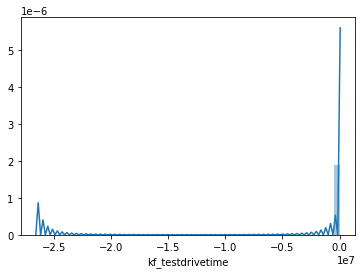

In [36]:
# 以下可检测单变量/两变量之间的分布
sns.scatterplot(td_ttl['kf_testdrivetime'],td_ttl['kf_testdrivedistance'])
sns.distplot(td_ttl['kf_testdrivetime'])
# len(td_ttl[(td_ttl['kf_testdrivetime'] == 0)])


### 合并订单表

In [ ]:
# 注意此处，两订单表已经完成.xlsx格式转.csv格式， 且两文件标头字段均为69列，因此可直接合并
df_order_19 = td_ttl = pd.read_csv('C:/Users/lenovo/Automobile/订单/df_order_2019.csv', index_col=0,low_memory = False, encoding = "utf_8_sig").reset_index(drop=True)
df_order_20 = td_ttl = pd.read_csv('C:/Users/lenovo/Automobile/订单/df_order_2020.csv', index_col=0,low_memory = False, encoding = "utf_8_sig").reset_index(drop=True)

print(df_order_19.shape)
df_order_20.shape

In [ ]:
# 进行合并
df_order_ttl = pd.concat([df_order_19, df_order_20])

df_order_ttl = df_order_ttl.reset_index(drop=True)

In [ ]:
#整理无效字段并进行删除
df_order_ttl.isna().sum().to_frame().sort_values(by=0, ascending = False)

In [ ]:
df_order_ttl.drop(['is_deleted','vchangedealer','vparentno','vcusno','vspresmsg','Unnamed: 61','vappoint','vdress','nsubscription','vmemo','vpostal','desticartime','dlost','vlostreason'], axis=1, inplace = True )

In [ ]:
# 将合并表保存为csv格式
df_order_ttl.to_csv('order_ttl.csv')

### 合并机会更新表

#### 原文件预处理

In [ ]:
# 读取全部22各文件, 在此时22个文件已经全部由.xlsx格式转化为.csv格式
oppo_fol_1 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_1.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_2 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_2.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_3 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_3.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_4 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_4.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_5 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_5.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_6 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_6.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_7 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_7.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_8 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_8.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_9 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_9.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_10 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_10.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_11 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_11.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_12 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_12.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_13 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_13.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_14 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_14.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_15 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_15.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_16 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_16.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_17 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_17.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_18 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_18.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_19 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_19.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_20 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_20.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_21 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_21.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")

oppo_fol_22 = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_22.csv',low_memory = False, index_col=0, encoding = "utf_8_sig")


In [ ]:
# 修改每张数据表的表头，以确保合并不会出错
oppo_fol_1.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_2.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_3.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_4.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_5.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_6.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_7.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_8.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_9.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_10.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_11.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_12.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_13.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_14.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_15.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_16.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_17.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_18.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_19.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_20.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_21.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

oppo_fol_22.columns = ['concat_id', 'concat_id_1', 'uid', 'ucusid', 'uprojectid', 'jdealer',
       'nbid', 'urelateid', 'vactiontype', 'dplanexec', 'drealexec',
       'vlinkresult', 'vcompleteflag', 'vnotes', 'vinfoback', 'vsubject',
       'bisapp', 'vowner', 'voldowner', 'dfirstdistribute', 'ddistribute',
       'utryid', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'vactionmode', 'vseries', 'vmodel', 'voriginvw',
       'vorigin', 'kf_projecttrackcount', 'kf_projectunexceptedcount',
       'kf_projectrealexeccount', 'ods_update_time', 'is_deleted', 'day_no',
       'rownum', 'Y-备注']

#### 合并表后并预处理

In [ ]:
# 合并22张表为oppo_fol_ttl
oppo_fol_ttl = pd.concat([oppo_fol_1,oppo_fol_2,oppo_fol_3,oppo_fol_4,oppo_fol_5,oppo_fol_6,oppo_fol_7,oppo_fol_8,oppo_fol_9,oppo_fol_10,oppo_fol_11,oppo_fol_12,oppo_fol_13,oppo_fol_14,oppo_fol_15,oppo_fol_16,oppo_fol_17,oppo_fol_18,oppo_fol_19,oppo_fol_20,oppo_fol_21,oppo_fol_22]
, axis=0).reset_index(drop=True)

# 更新表索引
oppo_fol_ttl = oppo_fol_ttl.reset_index(drop=True)

# 去除'concat_id'为空值的记录
oppo_fol_ttl.dropna(subset=['concat_id'], inplace = True)

# 查看表维度
oppo_fol_ttl.shape

#### 将表保存为csv格式

In [ ]:
oppo_fol_ttl.to_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_ttl.csv', encoding='utf_8_sig', index=True)

### 读取合并并预处理机会表

#### 合并机会表

In [ ]:
确保所有文件都在同一个目录下,将所有相同表在一个目录下 然后设置working directory之后运行以下两段代码

以下代码仅仅确保 所有文件都在同一目录下 
%ls
机会表_201907-201910.xlsx  机会表_202001.xlsx  机会表_202004.xlsx
机会表_201911.xlsx         机会表_202002.xlsx  机会表_202005.xlsx
机会表_201912.xlsx         机会表_202003.xlsx  机会表_202006.xlsx

In [ ]:
# 统一表头 并将.xlsx格式改变为.csv
import os
for i in os.listdir():
    if i[-5:] == '.xlsx':
        df = pd.read_excel(i)
        try:
            df.rename(columns={'序号': 'dwd_jetta_sales_order_dms_v1_t_d.index_number'}, inplace=True)
            df.rename(columns=lambda x: x[33:], inplace=True)
            df.to_csv(i.replace('xlsx', 'csv'))
        except:
            continue

In [ ]:
# 将每张表格都进行合并

import os
df = pd.DataFrame()
for i in os.listdir():
    if i[-4:] == '.csv':
        if df.empty:
            df = pd.read_csv(i,low_memory=False)
        else:
            try:
                df = pd.concat([df,pd.read_csv(i,low_memory=False)])
            except:
                print("An exception occurred during merging. Check columns.")

df = df.drop(columns = ['Unamed: 0']
df.to_csv('oppo_combined.csv')

In [152]:
# 此处 oppo_combined文件由Harry完成
df_oppo_ttl = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/5-机会表 - v3/oppo_combined.csv', index_col=0,low_memory = False, encoding = "utf_8_sig").iloc[:, 1:]

In [109]:
df_oppo_ttl.shape

(382856, 96)

#### 预处理

In [158]:
# oppo_trial_1 = df_oppo_ttl.isna().sum().to_frame().reset_index()

,index,0
0,concat_id,5223
1,psg_uid,5949
2,uid,5224
3,ucusid,5224
4,jdealer,5250
...,...,...
91,kf_yhcount,9754
92,kf_projectfailedcount,5225
93,ods_update_time,5312
94,is_deleted,382856


In [168]:
# 删除无效字段

df_oppo_ttl.drop(['mkid', 'vinfosourcevw', 'vinfosource', 'fwin', 'vexperiencetext', 'vcarintention', 'vcarintentiontext', 'vvisitexperience',
 'from_id', 'from_type', 'staflag', 'loanway', 'brepeatflag', 'is_deleted'], axis=1, inplace = True)

In [ ]:
# 删除所有与表关联相关的空值字段
oppo_ttl.dropna(subset = ['psg_uid','uid','ucusid'], inplace = True)

oppo_ttl.reset_index(drop=True)

#### 将已处理的表保存为csv格式

In [171]:
df_oppo_ttl.to_csv('C:/Users/lenovo/Automobile/机会战败模型/5-机会表 - v3/oppo_combined.csv', encoding='utf_8_sig', index=True)

### 读取合并并预处理的客流表

#### 合并客流表

确保所有文件都在同一个目录下,将所有相同表在一个目录下 然后设置working directory之后运行以下两段代码

以下代码仅仅确保 所有文件都在同一目录下 
%ls
客流表201907-V3（all done）加密完成版.xlsx
客流表201908-V3（all done）-加密完成版.xlsx
客流表201909-V3 加密完成版.xlsx
客流表201910-V3 加密完成版.xlsx
客流表201911-V3 加密完成版.xlsx
客流表201912-V3 加密完成版.xlsx
客流表202001-202002-V3 加密完成版.xlsx
客流表202003-V3 加密完成版.xlsx
客流表202004-V3 加密完成版.xlsx
客流表202005-V3 加密完成版.xlsx
客流表202006-V3 加密完成版.xlsx

In [ ]:
# 统一表头 并将.xlsx格式改变为.csv
import os
for i in os.listdir():
    if i[-5:] == '.xlsx':
        df = pd.read_excel(i)
        try:
            df.rename(columns={'序号': 'dwd_jetta_sales_order_dms_v1_t_d.index_number'}, inplace=True)
            df.rename(columns=lambda x: x[33:], inplace=True)
            df.to_csv(i.replace('xlsx', 'csv'))
        except:
            continue

In [ ]:
# 将每张表格都进行合并

import os
df = pd.DataFrame()
for i in os.listdir():
    if i[-4:] == '.csv':
        if df.empty:
            df = pd.read_csv(i,low_memory=False)
        else:
            try:
                df = pd.concat([df,pd.read_csv(i,low_memory=False)])
            except:
                print("An exception occurred during merging. Check columns.")

df = df.drop(columns = ['Unamed: 0']
df.to_csv('customer_flow_total.csv')

In [191]:
# 运行已经合并好的客流表
df_customer_flow_ttl = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/3-客流表-v3/customer_flow_total.csv', index_col=0, low_memory=False, encoding = "utf_8_sig")

#### 预处理

In [192]:
df_customer_flow_ttl.head()

,concat_id,uid,jdealer,nbid,vcusmobile,vsex,arrivetype,vbrand,vmodel,vpeernum,...,kf_zrfirstvisitcount,kf_yyfirstvisitcount,kf_ldfirstvisitcount,kf_firstvisithour,kf_nofirstvisitcount,kf_nofirstvisitday,kf_24potentialcount,ods_update_time,is_deleted,day_no
index_number,,,,,,,,,,,,,,,,,,,,,
1,20190909_SJ64001_0L13PV_06_01_马未华,000f9f53-42f8-44a2-9183-8090e18ca7af,SJ64001,75E64001-0000-0000-0000-000000000000,6a61f447e810a4e7ac810303a2fa0c73,NaN,NaN,0L,0L13PV,1.0,...,1.0,0.0,1.0,30.0,0.0,0.0,1.0,2020-07-03 00:20:14.423,NaN,0.0
2,20190911_SJ37020_0L14PY_06_01_仇睿轩,075515b4-c23e-41a0-83f6-cb3d9f13eb50,SJ37020,75883170-0000-0000-0000-000000000000,79dccca7b81c02eb3f9a05fa678d532f,0.0,NaN,0L,0L14PY,1.0,...,1.0,0.0,1.0,30.0,0.0,0.0,1.0,2020-07-03 00:25:29.437,NaN,0.0
3,20190907_SJ44006_#_06_01_陈玉环,07e8f3aa-332d-4eb4-b15a-86a317bf655a,SJ44006,75E44006-0000-0000-0000-000000000000,537d05e39d726bd55f33145f1cb63d93,1.0,NaN,0L,NaN,1.0,...,1.0,0.0,1.0,30.0,0.0,0.0,0.0,2020-07-03 00:08:15.42,NaN,0.0
4,20190908_SJ41008_#_06_01_王帅龙,07e9988b-096e-433a-a0ab-76d3159fd45c,SJ41008,75883520-0000-0000-0000-000000000000,b19b0ccb786f38813eeb540f4ea4cf75,NaN,NaN,0L,NaN,1.0,...,1.0,0.0,1.0,30.0,0.0,0.0,1.0,2020-07-03 00:08:15.42,NaN,0.0
5,20190930_SJ12001_#_06_01_王忠锋,07fd390a-0444-441d-b0e6-ff4068b2ce82,SJ12001,75E12001-0000-0000-0000-000000000000,dae8ef818361314806d6411522f79132,NaN,NaN,0M,NaN,1.0,...,1.0,0.0,1.0,30.0,0.0,0.0,0.0,2020-07-03 00:08:15.42,NaN,0.0


In [195]:
df_customer_flow_ttl.shape

(452150, 54)

##### 数据清理 - 去空

In [ ]:
# 删除绝大多数为空值的字段
cf_trial_1 = df_customer_flow_ttl.isna().sum().to_frame().reset_index().rename(columns={'index': 'attributes',0: 'counts'})

# print(list(cf_trial_1[cf_trial_1['counts'] > 450000]['attributes']))

df_customer_flow_ttl.drop(['arrivetype',  'vfrom',  'bisdistribute',  'dfirstdis', 'ddistribute',  'vdistributeman',  'bisconfirm',
 'vinvalidrsn',  'vinvalidrsntext',  'is_deleted'], axis=1, inplace = True)


In [200]:
# 此处发现很多时间变量均为异常值
# df_customer_flow_ttl[~df_customer_flow_ttl['ddistribute'].isna()]['ddistribute']

index_number
306      1970-01-01 00:00:00
1480     1970-01-01 00:00:00
3123     1970-01-01 00:00:00
6887     1970-01-01 00:00:00
7189     1970-01-01 00:00:00
8173     1970-01-01 00:00:00
12277    1970-01-01 00:00:00
13688    1970-01-01 00:00:00
14663    1970-01-01 00:00:00
25783    1970-01-01 00:00:00
30340    1970-01-01 00:00:00
30820    1970-01-01 00:00:00
31355    1970-01-01 00:00:00
31356    1970-01-01 00:00:00
39784    1970-01-01 00:00:00
44506    1970-01-01 00:00:00
54082    1970-01-01 00:00:00
Name: ddistribute, dtype: object

##### 去除所有数据均相同的行数

In [ ]:
sample_cf.drop_duplicates(inplace=True)


##### 去除所有uid均为空值的行数

In [ ]:
sample_cf.dropna(subset=['uid'],inplace = True)